# Star Wars Episode V Analysis

This analysis dives into the *Star Wars Episode V* script.

Source: https://www.kaggle.com/datasets/xvivancos/star-wars-movie-scripts?select=SW_EpisodeV.txt

## Data Cleaning

- Skip first line: *"character" "dialogue"*
- Lowercase each letter and split by quotes
- Create a dictionary, where each line is split by line number, name of character and dialouge. Dictionary is stored in a list.

A list is returned containing each individual line separated by line number, character name, and the dialouge. Each line is then separated by curly brackets.

In [3]:
sw_dic = []

with open("SW_EpisodeV.txt", "r") as text:
    """
    Input is a text file
    
    Returns a list containing each line separately
    Each line is split into line number, character name, and dialogue
    """
    text = text.readlines()[1:]  #skip first line
    for line in text:
        line = line.lower().split('"') #lowercase and split by quotes
        if len(line) > 5:
            try:
                dialogue = line.pop(5)
                name = line.pop(3)
                line_number = line.pop(1)
                new_obj = {
                    "line": line_number.strip(),
                    "name": name.strip(),
                    "dialogue": dialogue.strip()
                }
                sw_dic.append(new_obj)
            except IndexError:
                continue
            
print(sw_dic)

[{'line': '1', 'name': 'luke', 'dialogue': 'echo three to echo seven. han, old buddy, do you  read me?'}, {'line': '2', 'name': 'han', 'dialogue': "loud and clear, kid. what's up?"}, {'line': '3', 'name': 'luke', 'dialogue': "well, i finished my circle. i don't pick up any  life readings."}, {'line': '4', 'name': 'han', 'dialogue': "there isn't enough life on this ice cube to fill a  space cruiser. the sensors are placed. i'm going back."}, {'line': '5', 'name': 'luke', 'dialogue': "right. i'll see you shortly. there's a meteorite  that hit the ground near here. i want to check it out. it won't take long."}, {'line': '6', 'name': 'luke', 'dialogue': "hey, steady girl. what's the matter? you smell something?"}, {'line': '7', 'name': 'luke', 'dialogue': 'aaargh!'}, {'line': '8', 'name': 'han', 'dialogue': 'chewie!'}, {'line': '9', 'name': 'han', 'dialogue': "all right, don't lose your temper. i'll come right back and give  you a hand."}, {'line': '10', 'name': 'rieekan', 'dialogue': 'sol

## Data Analysis

This analysis utilizes the Natural Language Toolkit. For this project, I downloaded the most popular.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [6]:
#nltk.download('stopwords', force=True)
#nltk.download('punkt_tab')

#### How Often Does Each Character Speak

A numpy.ndarray containing of all the character names is created and stored in a list. Counter is used to calculate how many lines each character had which is stored in a dictionary.

In [8]:
arr = np.array(sw_dic) #numpy.ndarray contianing all character names

name_column = [row['name'] for row in arr] #list of all names

name_freq = dict(Counter(name_column)) #store in a dictionary

sorted_name_freq = dict(sorted(name_freq.items(), key=lambda item:item[1], reverse=True)) #sorts in descending order

print(sorted_name_freq)

{'han': 182, 'luke': 128, 'leia': 114, 'threepio': 92, 'lando': 61, 'vader': 56, 'yoda': 36, 'piett': 23, 'creature': 21, 'ben': 15, 'rieekan': 13, 'wedge': 8, 'deck officer': 7, 'veers': 7, 'zev': 6, 'ozzel': 5, 'needa': 5, 'emperor': 5, 'dack': 4, 'janson': 4, 'boba fett': 4, 'derlin': 3, 'announcer': 3, 'controller': 3, 'trench officer': 3, 'lieutenant': 2, 'senior controller': 2, 'medical droid': 2, 'imperial officer': 2, 'tracking officer': 2, 'communications officer': 2, 'intercom voice': 2, 'assistant officer': 1, 'rebel captain': 1, 'rebel fighter': 1, 'hobbie': 1, 'pilots': 1, 'captain': 1, 'woman controller': 1, 'head controller': 1, 'officer': 1, 'second officer': 1, 'pilot': 1, 'strange voice': 1, 'first controller': 1, 'second controller': 1, 'second threepio': 1, 'man': 1, 'imperial soldier': 1}


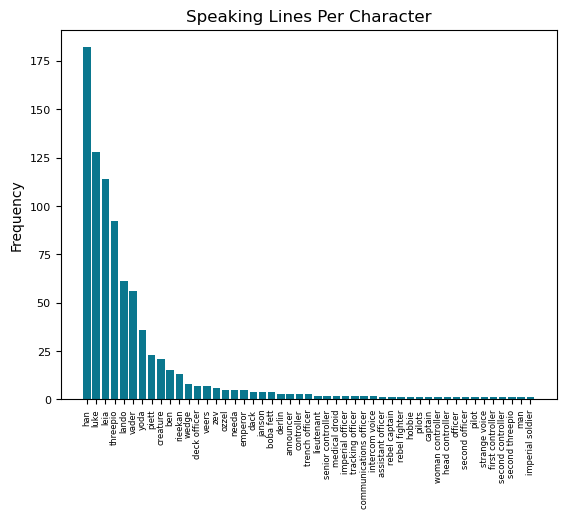

In [9]:
Character = sorted_name_freq.keys() #return the keys (character names)
Frequency = sorted_name_freq.values() #return the values (number of lines)

#bar chart comparing characters and the number of lines they have
plt.bar(Character, Frequency, color=['#0a778e'])
plt.title('Speaking Lines Per Character')
plt.xlabel('', labelpad= -10)
plt.xticks(rotation = 'vertical')
plt.xticks(fontsize= 6)
plt.ylabel('Frequency')
plt.yticks(fontsize = 8)
plt.show()

#### Most Active Character
This function returns the character with the most speaking lines

In [11]:
def most_frequent(name_column):
    """
    Returns the character who has the most speaking lines
    """
    counter = 0
    num = name_column[0]
    for i in name_column:
        freq = name_column.count(i)
        if(freq>counter):
            counter = freq
            num = i
    return num

print("The most active character in this episode is: ",most_frequent(name_column))

The most active character in this episode is:  han


#### The Top Three Characters
Find the 3 characters that have the most speaking lines.

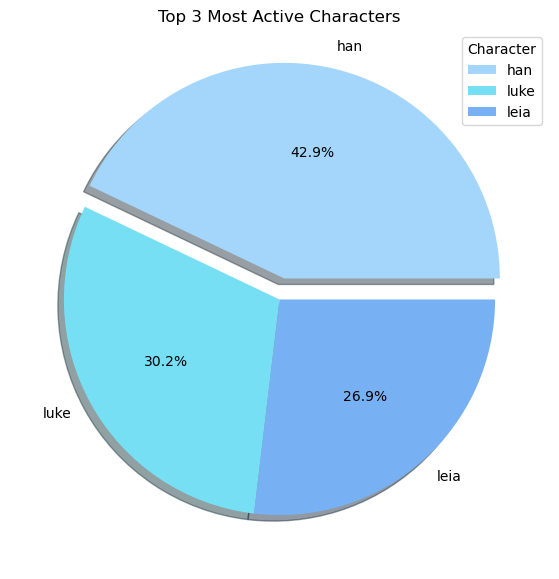

In [13]:
num_of_lines = Counter(name_column) #count how many lines per character

top_three = num_of_lines.most_common(3) #return the top 3

top_three_dic = dict(top_three) #convert into a dictionary

top_three_keys = top_three_dic.keys()
top_three_values = top_three_dic.values()

#create a pie chart of the top 3 most active characters
mycolors = ["#a3d6fa", "#77dff3", "#77b1f3"]
myexplode = (0.1, 0, 0) 
fig = plt.figure(figsize = (10,7))
plt.pie(top_three_values, labels = top_three_keys, autopct='%1.1f%%', shadow = True, colors = mycolors, explode = myexplode)
plt.title("Top 3 Most Active Characters")
plt.legend(title = "Character")
plt.show()

#### Most Commonly Used Words

A numpy.ndarray of all the dialogue is created and stored in a list. All punctuation and stopwords are removed.

In [15]:
dialogue_arr = np.array(sw_dic) #numpy.ndarray contianing all dialogue

char_lines = [row['dialogue'] for row in dialogue_arr] #list containing all dialogue

excluded = set(string.punctuation) #remove outer punctuation
char_lines = ' '.join(ch for ch in char_lines if ch not in excluded)
    
punc = '''!()-[]{};:'",<>./?@#$%^&*_~''' #remove additional punctuation
no_punct = " "
for char_punc in char_lines:
    if char_punc not in punc:
        no_punct = no_punct + char_punc
no_punct = no_punct

In [16]:
def remove_stopwords(script):
    """
    Returns a list ofeach word in script, excluding stopwords
    """
    stopWords = set(stopwords.words('english')) #define the stopwords using NLTK
    words = word_tokenize(script)
    filtered = [w for w in words if w.lower() not in stopWords]
    return filtered

cleaned = remove_stopwords(no_punct)
print(cleaned)

['echo', 'three', 'echo', 'seven', 'han', 'old', 'buddy', 'read', 'loud', 'clear', 'kid', 'whats', 'well', 'finished', 'circle', 'dont', 'pick', 'life', 'readings', 'isnt', 'enough', 'life', 'ice', 'cube', 'fill', 'space', 'cruiser', 'sensors', 'placed', 'im', 'going', 'back', 'right', 'ill', 'see', 'shortly', 'theres', 'meteorite', 'hit', 'ground', 'near', 'want', 'check', 'wont', 'take', 'long', 'hey', 'steady', 'girl', 'whats', 'matter', 'smell', 'something', 'aaargh', 'chewie', 'right', 'dont', 'lose', 'temper', 'ill', 'come', 'right', 'back', 'give', 'hand', 'solo', 'sign', 'life', 'general', 'sensors', 'place', 'youll', 'know', 'anything', 'comes', 'around', 'commander', 'skywalker', 'reported', 'yet', 'hes', 'checking', 'meteorite', 'hit', 'near', 'meteor', 'activity', 'system', 'going', 'difficult', 'spot', 'approaching', 'ships', 'general', 'ive', 'got', 'leave', 'cant', 'stay', 'anymore', 'im', 'sorry', 'hear', 'well', 'theres', 'price', 'head', 'dont', 'pay', 'jabba', 'hut',

Find the 20 most common words.

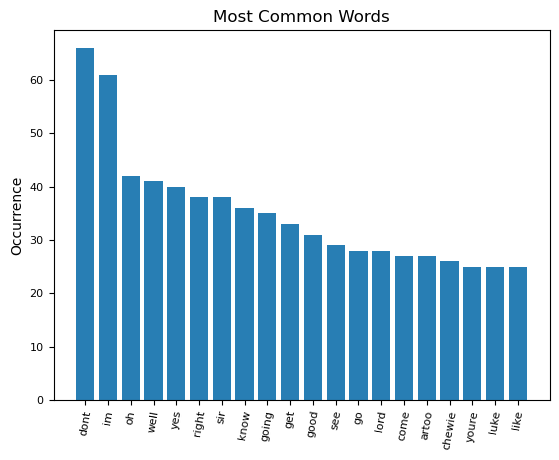

In [18]:
count_per_word = Counter(cleaned)  #count occurrences of each word

most_common_words = count_per_word.most_common(20) #return top 20

#separate the list of tuples into separate lists for words and their counts
most_freq_words = [word for word, _ in most_common_words]
occurrence_of_word = [count for _, count in most_common_words]

plt.bar(most_freq_words, occurrence_of_word, color=['#287eb4'])
plt.title('Most Common Words')
plt.xlabel('', labelpad=-4)
plt.xticks(rotation=80)
plt.xticks(fontsize=8)
plt.ylabel('Occurrence')
plt.yticks(fontsize=8)
plt.show()

#### Conclusion
This project analyzes the *Star Wars Episode V* script obtained from Kaggle. 

Among the characters, Han Solo had the highest number of speaking lines, followed by Luke and Leia. After filtering out the stopwords, the 20 most frequently used words were identified. The top word spoken was "don't". "Luke" also appears in this list, which is expected given his key role in the story. Notably, names like "Artoo" and "Chewie" also made the list, highlighting their memorable presence in the film.